In [63]:
## Data Collection: Load csv files and check contents

import pandas as pd
import glob

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Define the path to your CSV files
csv_files = glob.glob('fuel_prices_*.csv')  # Assumes all files start with 'fuel_price_' and are in the current directory

# Load all CSV files into a list of DataFrames
df_list = [pd.read_csv(file) for file in csv_files]

# Concatenate all DataFrames into one DataFrame
df = pd.concat(df_list, ignore_index=True)

# Display the shape of the combined DataFrame to verify
print(df.shape)
df.head(20)

(469336, 12)


,SiteId,Site_Name,Site_Brand,Sites_Address_Line_1,Site_Suburb,Site_State,Site_Post_Code,Site_Latitude,Site_Longitude,Fuel_Type,Price,TransactionDateutc
0,61401007,7-Eleven Coomera,7 Eleven,Pacific Highway,Coomera,QLD,4209,-27.868591,153.314206,e10,1879,31/03/2024 18:20
1,61401007,7-Eleven Coomera,7 Eleven,Pacific Highway,Coomera,QLD,4209,-27.868591,153.314206,e10,2339,16/04/2024 04:46
2,61401007,7-Eleven Coomera,7 Eleven,Pacific Highway,Coomera,QLD,4209,-27.868591,153.314206,LPG,1119,31/03/2024 18:20
3,61401007,7-Eleven Coomera,7 Eleven,Pacific Highway,Coomera,QLD,4209,-27.868591,153.314206,Premium Diesel,1999,31/03/2024 18:20
4,61401007,7-Eleven Coomera,7 Eleven,Pacific Highway,Coomera,QLD,4209,-27.868591,153.314206,PULP 98 RON,2109,31/03/2024 18:20
5,61401007,7-Eleven Coomera,7 Eleven,Pacific Highway,Coomera,QLD,4209,-27.868591,153.314206,PULP 98 RON,2569,16/04/2024 04:46
6,61401007,7-Eleven Coomera,7 Eleven,Pacific Highway,Coomera,QLD,4209,-27.868591,153.314206,Unleaded,1899,31/03/2024 18:20
7,61401007,7-Eleven Coomera,7 Eleven,Pacific Highway,Coomera,QLD,4209,-27.868591,153.314206,Unleaded,2359,16/04/2024 04:46
8,61401008,EG Ampol Oxenford,EG Ampol,116 Old Pacific Highway,Oxenford,QLD,4210,-27.891217,153.313369,e10,1849,31/03/2024 14:00
9,61401008,EG Ampol Oxenford,EG Ampol,116 Old Pacific Highway,Oxenford,QLD,4210,-27.891217,153.313369,e10,1859,09/04/2024 01:15


In [64]:
# Check for missing values (NaN or null) in each column
missing_values = df.isnull().sum()
print(missing_values)

SiteId                  0
Site_Name               0
Site_Brand              0
Sites_Address_Line_1    0
Site_Suburb             0
Site_State              0
Site_Post_Code          0
Site_Latitude           0
Site_Longitude          0
Fuel_Type               0
Price                   0
TransactionDateutc      0
dtype: int64


In [65]:
# Check for infinite values
infinite_values = df.isin([float('inf'), float('-inf')]).sum()
print(infinite_values)

SiteId                  0
Site_Name               0
Site_Brand              0
Sites_Address_Line_1    0
Site_Suburb             0
Site_State              0
Site_Post_Code          0
Site_Latitude           0
Site_Longitude          0
Fuel_Type               0
Price                   0
TransactionDateutc      0
dtype: int64


In [66]:
# Check data types of each column
print(df.dtypes)

SiteId                    int64
Site_Name                object
Site_Brand               object
Sites_Address_Line_1     object
Site_Suburb              object
Site_State               object
Site_Post_Code            int64
Site_Latitude           float64
Site_Longitude          float64
Fuel_Type                object
Price                     int64
TransactionDateutc       object
dtype: object


In [67]:
# Set pandas option to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)        # Set display width to avoid line breaks

# Check for duplicates based on specific columns (e.g., SiteId, Site_Name)
duplicates_subset = df[df.duplicated(subset=['SiteId', 'Fuel_Type', 'Price', 'TransactionDateutc'])]
print("Duplicates based on SiteId, Fuel_Type, Price, and TransactionDateutc:\n", duplicates_subset)

Duplicates based on SiteId, Fuel_Type, Price, and TransactionDateutc:
           SiteId               Site_Name    Site_Brand   Sites_Address_Line_1 Site_Suburb Site_State  Site_Post_Code  Site_Latitude  Site_Longitude    Fuel_Type  Price TransactionDateutc
87122   61478032    Pearl Energy Pimpama  Pearl Energy      404 Yawalpah Road     Coomera        QLD            4209     -27.826603      153.330178  PULP 98 RON   1825   24/09/2024 22:22
156991  61478091         Mobil Berserker         Mobil  12 Queen Elizabeth Dr   Berserker        QLD            4701     -23.371540      150.519524          e10   1895   12/05/2024 11:06
200634  61477126  Seaforth General Store         Ampol            8 George St    Seaforth        QLD            4741     -20.901699      148.967698     Unleaded   1926   01/07/2024 04:25
358960  61478032    Pearl Energy Pimpama  Pearl Energy      404 Yawalpah Road     Coomera        QLD            4209     -27.826603      153.330178       Diesel   1935   05/02/2024 

In [68]:
# Check for duplicates across all columns
duplicates_all_columns = df[df.duplicated(keep=False)]
print("Duplicates across all columns:\n", duplicates_all_columns)

Duplicates across all columns:
           SiteId               Site_Name    Site_Brand   Sites_Address_Line_1 Site_Suburb Site_State  Site_Post_Code  Site_Latitude  Site_Longitude    Fuel_Type  Price TransactionDateutc
87120   61478032    Pearl Energy Pimpama  Pearl Energy      404 Yawalpah Road     Coomera        QLD            4209     -27.826603      153.330178  PULP 98 RON   1825   24/09/2024 22:22
87122   61478032    Pearl Energy Pimpama  Pearl Energy      404 Yawalpah Road     Coomera        QLD            4209     -27.826603      153.330178  PULP 98 RON   1825   24/09/2024 22:22
156989  61478091         Mobil Berserker         Mobil  12 Queen Elizabeth Dr   Berserker        QLD            4701     -23.371540      150.519524          e10   1895   12/05/2024 11:06
156991  61478091         Mobil Berserker         Mobil  12 Queen Elizabeth Dr   Berserker        QLD            4701     -23.371540      150.519524          e10   1895   12/05/2024 11:06
200632  61477126  Seaforth Genera

In [69]:
# Ensure Price is numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Ensure TransactionDateutc is a datetime object
df['TransactionDateutc'] = pd.to_datetime(df['TransactionDateutc'], errors='coerce')

# Check for duplicates again
duplicates_subset = df[df.duplicated(subset=['SiteId', 'Fuel_Type', 'Price', 'TransactionDateutc'])]
print(duplicates_subset)

          SiteId               Site_Name    Site_Brand   Sites_Address_Line_1 Site_Suburb Site_State  Site_Post_Code  Site_Latitude  Site_Longitude    Fuel_Type  Price  TransactionDateutc
87122   61478032    Pearl Energy Pimpama  Pearl Energy      404 Yawalpah Road     Coomera        QLD            4209     -27.826603      153.330178  PULP 98 RON   1825 2024-09-24 22:22:00
156991  61478091         Mobil Berserker         Mobil  12 Queen Elizabeth Dr   Berserker        QLD            4701     -23.371540      150.519524          e10   1895 2024-05-12 11:06:00
200634  61477126  Seaforth General Store         Ampol            8 George St    Seaforth        QLD            4741     -20.901699      148.967698     Unleaded   1926 2024-07-01 04:25:00
358960  61478032    Pearl Energy Pimpama  Pearl Energy      404 Yawalpah Road     Coomera        QLD            4209     -27.826603      153.330178       Diesel   1935 2024-02-05 12:45:00


/var/folders/wz/zmc0gwmn2n57xys67hh2y13c0000gn/T/ipykernel_71304/3102218701.py:5: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['TransactionDateutc'] = pd.to_datetime(df['TransactionDateutc'], errors='coerce')


In [70]:
# Drop duplicates, keeping the first occurrence
df_cleaned = df.drop_duplicates(keep='first')

# Verify that duplicates are removed
print("Number of rows after dropping duplicates:", df_cleaned.shape[0])

Number of rows after dropping duplicates: 469332


In [71]:
# Check if any duplicates remain in the cleaned DataFrame
duplicates_after_cleaning = df_cleaned[df_cleaned.duplicated(keep=False)]
print("Remaining duplicates after cleaning:\n", duplicates_after_cleaning)

Remaining duplicates after cleaning:
 Empty DataFrame
Columns: [SiteId, Site_Name, Site_Brand, Sites_Address_Line_1, Site_Suburb, Site_State, Site_Post_Code, Site_Latitude, Site_Longitude, Fuel_Type, Price, TransactionDateutc]
Index: []


In [72]:
# Describe the numeric columns (shows min, max, mean, etc.)
print(df.describe())

             SiteId  Site_Post_Code  Site_Latitude  Site_Longitude          Price             TransactionDateutc
count  4.693360e+05   469336.000000  469336.000000   469336.000000  469336.000000                         469336
mean   6.142713e+07     4299.529863     -26.654728      152.386528    2056.419857  2024-05-28 02:33:20.868375552
min    6.129015e+07     2486.000000     -28.973467      138.117892       1.000000            2023-12-31 14:00:00
25%    6.140162e+07     4117.000000     -27.645205      152.792164    1879.000000            2024-03-22 00:30:15
50%    6.140225e+07     4212.000000     -27.504950      153.023236    1999.000000            2024-06-03 08:15:00
75%    6.147714e+07     4503.000000     -27.202591      153.111388    2149.000000            2024-08-02 08:26:15
max    6.147825e+07     4895.000000      -9.750595      153.541441    9999.000000            2024-09-30 13:12:00
std    3.512798e+04      246.269662       2.431686        1.809363     582.915566               

In [73]:
# Check unique values for categorical columns
print(df['Site_Brand'].unique())
print(df['Fuel_Type'].unique())

['7 Eleven' 'EG Ampol' 'Coles Express' 'Ampol' 'Caltex' 'Freedom Fuels'
 'Metro Fuel' 'BP' 'Pearl Energy' 'Independent' 'Liberty' 'Shell'
 'Puma Energy' 'United' 'Unknown' 'Pacific Petroleum' 'Reddy Express'
 'Mobil' 'Pacific Fuel Solutio' 'Enhance' 'Lowes' 'Astron' 'IOR Petroleum'
 'Choice' 'Costco' 'Perrys' 'U-Go' 'Atlas Fuel' 'Matilda']
['e10' 'LPG' 'Premium Diesel' 'PULP 98 RON' 'Unleaded' 'PULP 95/96 RON'
 'Diesel' 'e85' 'OPAL']


In [76]:
# Filter rows where Site_Brand is 'Unknown' and get distinct SiteId with other info
distinct_unknown_sites = df[df['Site_Brand'] == 'Unknown'][['SiteId', 'Site_Name', 'Sites_Address_Line_1', 'Site_Suburb', 'Site_State', 'Site_Post_Code', 'Site_Latitude', 'Site_Longitude']].drop_duplicates()

# Print distinct SiteId along with other site information
print(distinct_unknown_sites)

          SiteId                          Site_Name                Sites_Address_Line_1     Site_Suburb Site_State  Site_Post_Code  Site_Latitude  Site_Longitude
1783    61401206           Ampol Foodary Park Ridge       3726-3730 Mt Lindesay Highway      Park Ridge        QLD            4125     -27.696775      153.038071
2238    61401248                    Puma Strathpine                     116 Gympie Road      Strathpine        QLD            4500     -27.313978      152.992774
6664    61401613            Ampol Foodary Cleveland      209 Bloomfield St Cnr Ross Ctr       Cleveland        QLD            4163     -27.532546      153.266347
6735    61401620           Ampol Foodary Loganholme                     80 Bryants Road      Loganholme        QLD            4129     -27.662977      153.179704
154561  61478008  Fresh Trading Co. Mobil Rasmussen                    2-4 Santal Drive       Rasmussen        QLD            4815     -19.352689      146.731468
156124  61478051     Fresh T

In [77]:
print(df[df['SiteId']==61401206])

          SiteId                 Site_Name Site_Brand           Sites_Address_Line_1 Site_Suburb Site_State  Site_Post_Code  Site_Latitude  Site_Longitude    Fuel_Type  Price  TransactionDateutc
1783    61401206  Ampol Foodary Park Ridge    Unknown  3726-3730 Mt Lindesay Highway  Park Ridge        QLD            4125     -27.696775      153.038071          e10   1979 2024-03-31 14:01:00
1784    61401206  Ampol Foodary Park Ridge    Unknown  3726-3730 Mt Lindesay Highway  Park Ridge        QLD            4125     -27.696775      153.038071          e10   1959 2024-04-01 20:53:00
1785    61401206  Ampol Foodary Park Ridge    Unknown  3726-3730 Mt Lindesay Highway  Park Ridge        QLD            4125     -27.696775      153.038071          e10   1939 2024-04-03 19:08:00
1786    61401206  Ampol Foodary Park Ridge    Unknown  3726-3730 Mt Lindesay Highway  Park Ridge        QLD            4125     -27.696775      153.038071          e10   1919 2024-04-09 07:12:00
1787    61401206  Ampol F

In [78]:
# Ensure that the TransactionDateutc column is in datetime format
df['TransactionDateutc'] = pd.to_datetime(df['TransactionDateutc'], errors='coerce')

# Sort the DataFrame by SiteId and TransactionDateutc
df_sorted = df.sort_values(by=['SiteId', 'TransactionDateutc'])

# Get the last row for each SiteId
last_rows_per_site = df_sorted.groupby('SiteId').tail(1)

# Print the last rows for each SiteId
print(last_rows_per_site)

          SiteId                    Site_Name     Site_Brand     Sites_Address_Line_1    Site_Suburb Site_State  Site_Post_Code  Site_Latitude  Site_Longitude       Fuel_Type  Price  TransactionDateutc
361651  61290151                Liberty Surat        Liberty       61 Burrowes Street          Surat        QLD            4417     -27.151687      149.067742          Diesel   1899 2024-08-23 23:49:00
31444   61291313           Lowes Mungindi Opt             BP        126 Barwon Street       Mungindi        QLD            4497     -28.973467      148.983829        Unleaded   1850 2024-09-18 22:00:00
31489   61401007             7-Eleven Coomera       7 Eleven          Pacific Highway        Coomera        QLD            4209     -27.868591      153.314206        Unleaded   1999 2024-09-30 04:44:00
31508   61401008            EG Ampol Oxenford       EG Ampol  116 Old Pacific Highway       Oxenford        QLD            4210     -27.891217      153.313369  Premium Diesel   1839 2024-09-30

In [80]:
print(last_rows_per_site[last_rows_per_site['SiteId']==61401206])

         SiteId        Site_Name Site_Brand           Sites_Address_Line_1 Site_Suburb Site_State  Site_Post_Code  Site_Latitude  Site_Longitude       Fuel_Type  Price  TransactionDateutc
36565  61401206  U-Go Park Ridge       U-Go  3726-3730 Mt Lindesay Highway  Park Ridge        QLD            4125     -27.696775      153.038071  Premium Diesel   1669 2024-09-30 05:50:00


In [2]:
import pandas as pd

# Step 0: Data Cleaning
cleaned_fuel_data = df[df['Price'] != 9999]

# Remove outliers using the IQR method
Q1 = cleaned_fuel_data['Price'].quantile(0.25)
Q3 = cleaned_fuel_data['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cleaned_fuel_data = cleaned_fuel_data[(cleaned_fuel_data['Price'] >= lower_bound) & (cleaned_fuel_data['Price'] <= upper_bound)]

# Convert 'TransactionDateutc' to datetime format and truncate to date
cleaned_fuel_data['TransactionDateutc'] = pd.to_datetime(cleaned_fuel_data['TransactionDateutc'], format="%d/%m/%Y %H:%M").dt.date

# Step 1: Aggregating Daily Prices (min, median, max) per fuel type
daily_fuel_prices = cleaned_fuel_data.groupby([pd.Grouper(key='TransactionDateutc'), 'Fuel_Type'])['Price'].agg(['min', 'median', 'max']).reset_index()

# Load crude oil prices and clean up the data
crude_oil_data = pd.read_csv('Crude Oil WTI Futures Historical Data.csv')
crude_oil_data['Date'] = pd.to_datetime(crude_oil_data['Date'], format="%m/%d/%Y").dt.date
crude_oil_data_clean = crude_oil_data[['Date', 'Price']].dropna()

# Merge fuel prices with crude oil data
merged_data = pd.merge(daily_fuel_prices, crude_oil_data_clean, left_on='TransactionDateutc', right_on='Date', how='inner')

# Step 2: Clean TGP Petrol and Diesel Data
tgp_petrol_data = pd.read_csv('Petrol TGP-Table 1.csv')
tgp_diesel_data = pd.read_csv('Diesel TGP-Table 1.csv')

# TGP petrol data
tgp_petrol_data.columns = ['Date', 'Sydney', 'Melbourne', 'Brisbane', 'Adelaide', 'Perth', 'Darwin', 'Hobart', 'National_Average_Petrol']
tgp_petrol_data['Date'] = pd.to_datetime(tgp_petrol_data['Date'], format='%A, %B %d, %Y').dt.date

# TGP diesel data
tgp_diesel_data.columns = ['Date', 'Sydney', 'Melbourne', 'Brisbane', 'Adelaide', 'Perth', 'Darwin', 'Hobart', 'National_Average_Diesel']
tgp_diesel_data['Date'] = pd.to_datetime(tgp_diesel_data['Date'], format='%A, %B %d, %Y').dt.date

# Step 3: Merging with TGP Data

# Merge petrol TGP
merged_data_with_tgp = pd.merge(merged_data, tgp_petrol_data[['Date', 'National_Average_Petrol']], on='Date', how='left')

# Merge diesel TGP
merged_data_with_tgp = pd.merge(merged_data_with_tgp, tgp_diesel_data[['Date', 'National_Average_Diesel']], on='Date', how='left')

# Step 4: Aligning TGP values with Fuel Types

# Create a column that selects Petrol TGP for petrol-based fuels and Diesel TGP for diesel-based fuels
merged_data_with_tgp['TGP'] = merged_data_with_tgp.apply(
    lambda row: row['National_Average_Petrol'] if 'Petrol' in row['Fuel_Type'] or 'Unleaded' in row['Fuel_Type'] or 'PULP' in row['Fuel_Type']
                else row['National_Average_Diesel'] if 'Diesel' in row['Fuel_Type'] else None, axis=1)

merged_data_with_tgp['National_Average_Diesel'] = merged_data_with_tgp['National_Average_Diesel'] * 10
merged_data_with_tgp['National_Average_Petrol'] = merged_data_with_tgp['National_Average_Petrol'] * 10
merged_data_with_tgp['TGP'] = merged_data_with_tgp['TGP'] * 10
# Display the merged dataset with aligned TGP
print(merged_data_with_tgp.head())

  TransactionDateutc       Fuel_Type   min  median   max        Date  Price   
0         2024-01-01          Diesel  1735  1899.5  2100  2024-01-01  71.97  \
1         2024-01-01  PULP 95/96 RON  1767  1879.0  2299  2024-01-01  71.97   
2         2024-01-01     PULP 98 RON  1825  1952.0  2399  2024-01-01  71.97   
3         2024-01-01  Premium Diesel  1719  1949.0  2199  2024-01-01  71.97   
4         2024-01-01        Unleaded  1625  1739.0  2099  2024-01-01  71.97   

   National_Average_Petrol  National_Average_Diesel     TGP  
0                   1660.0                   1749.0  1749.0  
1                   1660.0                   1749.0  1660.0  
2                   1660.0                   1749.0  1660.0  
3                   1660.0                   1749.0  1749.0  
4                   1660.0                   1749.0  1660.0  


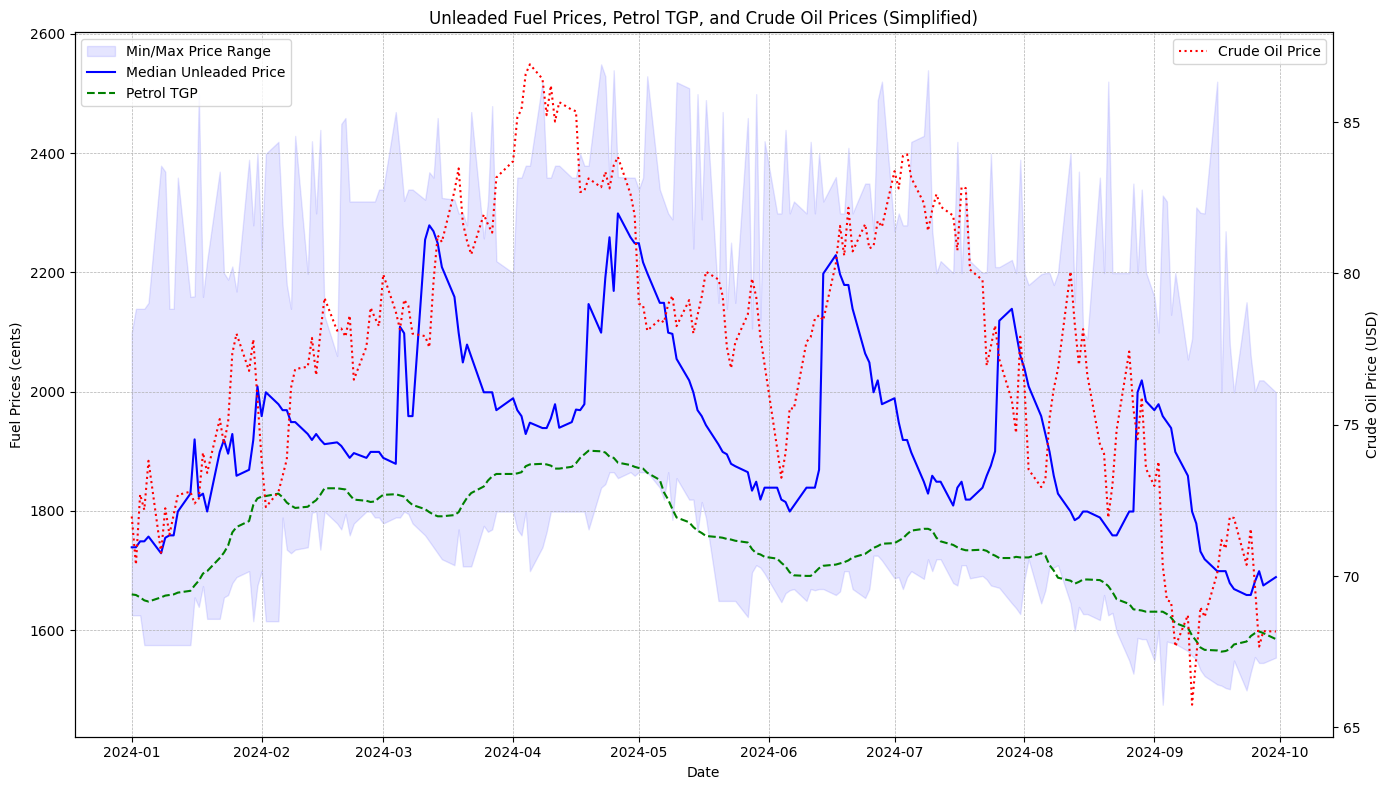

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter the data for Unleaded fuel
unleaded_data = merged_data_with_tgp[merged_data_with_tgp['Fuel_Type'] == 'Unleaded']

# Step 2: Set up the plot
plt.figure(figsize=(14, 8))

# Plotting Min/Max Price Band with faint color
plt.fill_between(
    unleaded_data['TransactionDateutc'], 
    unleaded_data['min'], 
    unleaded_data['max'], 
    color='blue', 
    alpha=0.1, 
    label='Min/Max Price Range'
)

# Plotting Median Unleaded price
sns.lineplot(x='TransactionDateutc', y='median', data=unleaded_data, label='Median Unleaded Price', color='blue')

# Plotting Petrol TGP with a different line style
sns.lineplot(x='TransactionDateutc', y='TGP', data=unleaded_data, label='Petrol TGP', color='green', linestyle='--')

# Step 3: Create a secondary y-axis for crude oil prices
ax = plt.gca()  # Get the current axis
ax2 = ax.twinx()  # Create a twin axis sharing the same x-axis

# Plotting Crude Oil Prices on the secondary y-axis
sns.lineplot(x='TransactionDateutc', y='Price', data=unleaded_data, label='Crude Oil Price', ax=ax2, color='red', linestyle=':')

# Step 4: Adding gridlines for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Labels and Legends
ax.set_xlabel('Date')
ax.set_ylabel('Fuel Prices (cents)')
ax2.set_ylabel('Crude Oil Price (USD)')
plt.title('Unleaded Fuel Prices, Petrol TGP, and Crude Oil Prices (Simplified)')

# Adding legends for both y-axes
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Step 5: Show the plot
plt.tight_layout()
plt.show()